<h1 align='left side' style='color:purple'>Cricket Player Performance Prediction Using Machine Learning</h1>

By Md Ashraf

# Importing libraries

In [124]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [125]:
br = pd.read_csv("Player_dataset.csv")
br['Opposition'] = br['Opposition'].str.replace('v ','')
br

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
0,6,49619,Oshane Thomas,WestIndies,India,0*,0,8,0.00,0,0,Dhaka,10 Jan 2010,ODI # 2941,NaN,NaN,NaN,NaN,NaN,NaN
1,10,49619,Oshane Thomas,WestIndies,England,1*,1,3,33.33,0,0,Nottingham,6 Jul 2011,ODI # 3169,NaN,NaN,NaN,NaN,NaN,NaN
2,11,49619,Oshane Thomas,WestIndies,Australia,0*,0,2,0.00,0,0,Pallekele,10 Aug 2011,ODI # 3175,NaN,NaN,NaN,NaN,NaN,NaN
3,12,49619,Oshane Thomas,WestIndies,Pakistan,0,0,2,0.00,0,0,Dubai (DSC),11 Nov 2011,ODI # 3212,NaN,NaN,NaN,NaN,NaN,NaN
4,14,49619,Oshane Thomas,WestIndies,Pakistan,0,0,4,0.00,0,0,Dhaka,15 Mar 2012,ODI # 3260,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,11143,352048,Gulbadin Naib,Afghanistan,Bangladesh,0*,0,2,0.00,0,0,Abu Dhabi,23 Sep 2018,ODI # 4045,249/7,NaN,50.0,4.98,1.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied
8815,11145,352048,Gulbadin Naib,Afghanistan,Ireland,46,46,61,75.40,6,1,Dehradun,28 Feb 2019,ODI # 4100,165/5,162.0,41.5,3.94,2.0,won
8816,11146,352048,Gulbadin Naib,Afghanistan,Ireland,3,3,6,50.00,0,0,Dehradun,2 Mar 2019,ODI # 4101,250/7,NaN,48.3,5.15,1.0,n/r


# Data cleaning

In [126]:
br.isnull().sum()

ID               0
Player_ID        0
Player           0
Country          0
Opposition       0
Bat1             0
Runs             0
BF               0
SR               0
4s               0
6s               0
Ground           0
Start Date       0
Match_ID         0
Team Runs     2626
Target        5732
Overs         2626
RPO           2626
Inns          2626
Result        2626
dtype: int64

In [127]:
br.dropna(inplace=True)

In [128]:
br.isnull().sum()

ID            0
Player_ID     0
Player        0
Country       0
Opposition    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Ground        0
Start Date    0
Match_ID      0
Team Runs     0
Target        0
Overs         0
RPO           0
Inns          0
Result        0
dtype: int64

# Exploratory Data Analysis

In [129]:
br

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
7,18,49619,Oshane Thomas,WestIndies,Pakistan,1*,1,1,100.00,0,0,Sharjah,18 Dec 2013,ODI # 3445,311,323.0,49.4,6.26,2.0,lost
9,27,49619,Oshane Thomas,WestIndies,England,4*,4,5,80.00,0,0,The Oval,22 May 2014,ODI # 3492,144,226.0,27.5,5.17,2.0,lost
10,30,49619,Oshane Thomas,WestIndies,New Zealand,0,0,3,0.00,0,0,Dunedin,23 Jan 2015,ODI # 3588,252,361.0,43.4,5.77,2.0,lost
11,31,49619,Oshane Thomas,WestIndies,New Zealand,3,3,5,60.00,0,0,Dunedin,25 Jan 2015,ODI # 3590,195,316.0,40.3,4.81,2.0,lost
12,32,49619,Oshane Thomas,WestIndies,New Zealand,7*,7,17,41.17,0,0,Christchurch,14 Feb 2015,ODI # 3599,233,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,11140,352048,Gulbadin Naib,Afghanistan,Sri Lanka,4,4,5,80.00,0,0,Abu Dhabi,17 Sep 2018,ODI # 4038,158,250.0,41.2,3.82,2.0,lost
8811,11141,352048,Gulbadin Naib,Afghanistan,Bangladesh,42*,42,38,110.52,5,0,Abu Dhabi,20 Sep 2018,ODI # 4041,119,256.0,42.1,2.82,2.0,lost
8812,11142,352048,Gulbadin Naib,Afghanistan,Pakistan,10*,10,7,142.85,1,0,Abu Dhabi,21 Sep 2018,ODI # 4043,258/7,258.0,49.3,5.21,2.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied


In [130]:
br.describe()

,ID,Player_ID,Runs,BF,SR,4s,6s,Target,Overs,Inns
count,3086.000000,3.086000e+03,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.0
mean,5813.602074,2.539303e+05,30.366818,33.863253,82.964332,2.786455,0.604990,266.442320,42.007323,2.0
std,3153.114936,1.889530e+05,33.430199,32.897672,51.638874,3.384409,1.261252,66.641748,8.760664,0.0
min,18.000000,5.334000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,68.000000,3.200000,2.0
25%,3113.250000,4.975800e+04,6.000000,9.000000,53.330000,0.000000,0.000000,227.000000,39.100000,2.0
50%,5961.500000,2.707495e+05,19.000000,23.000000,80.000000,2.000000,0.000000,270.000000,44.500000,2.0
75%,8329.750000,3.481440e+05,44.000000,49.000000,104.812500,4.000000,1.000000,311.000000,48.500000,2.0
max,11145.000000,1.158100e+06,264.000000,173.000000,460.000000,33.000000,14.000000,445.000000,50.000000,2.0


# Teams which played most matches

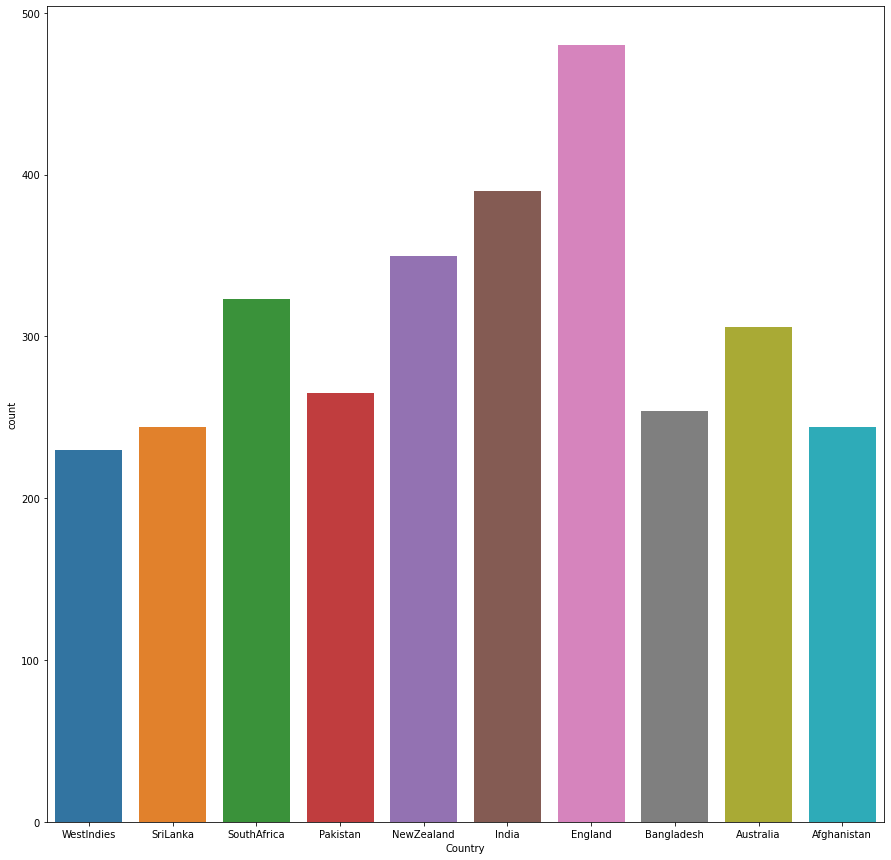

In [131]:
plt.figure(figsize=(15,15))
sea.countplot(x='Country',data=br)
plt.show()

# Result count

<AxesSubplot:xlabel='Result', ylabel='count'>

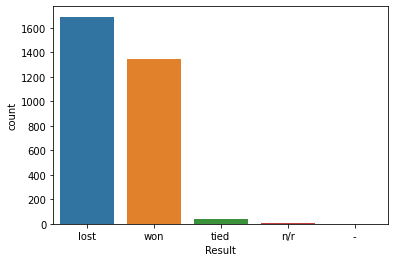

In [132]:
sea.countplot(x='Result', data=br)

In [133]:
new=br.loc[(br['Result']=='lost')& (br['Player']=='Andre Russell')]
new

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
69,121,276298,Andre Russell,WestIndies,Australia,43,43,31,138.70,6,1,Canberra,6 Feb 2013,ODI # 3332,290,330.0,47.3,6.1,2.0,lost
74,127,276298,Andre Russell,WestIndies,India,4,4,6,66.66,0,0,Delhi,11 Oct 2014,ODI # 3533,215,264.0,46.3,4.62,2.0,lost
75,128,276298,Andre Russell,WestIndies,India,46,46,23,200.00,6,3,Dharamsala,17 Oct 2014,ODI # 3535,271,331.0,48.1,5.62,2.0,lost
76,129,276298,Andre Russell,WestIndies,South Africa,19,19,8,237.50,1,2,Durban,16 Jan 2015,ODI # 3579,164,226.0,28.2,5.78,2.0,lost
77,130,276298,Andre Russell,WestIndies,South Africa,0,0,1,0.00,0,0,Johannesburg,18 Jan 2015,ODI # 3583,291/7,440.0,50.0,5.82,2.0,lost
80,133,276298,Andre Russell,WestIndies,South Africa,24,24,12,200.00,4,1,Centurion,28 Jan 2015,ODI # 3593,230,362.0,37.4,6.1,2.0,lost
83,137,276298,Andre Russell,WestIndies,South Africa,0,0,3,0.00,0,0,Sydney,27 Feb 2015,ODI # 3616,151,409.0,33.1,4.55,2.0,lost
86,140,276298,Andre Russell,WestIndies,New Zealand,20,20,11,181.81,1,2,Wellington,21 Mar 2015,ODI # 3643,250,394.0,30.3,8.19,2.0,lost
88,142,276298,Andre Russell,WestIndies,Bangladesh,13,13,12,108.33,1,1,Providence,22 Jul 2018,ODI # 4022,231/9,280.0,50.0,4.62,2.0,lost


In [134]:
c=br['Country'].unique()
c

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

In [135]:
v=br.loc[br['Runs'] > 150 ]
arrnp = v['Player'].values

In [136]:
runs = v['Runs'].tolist()
runs
players = v['Player'].tolist()
print(players)
print(runs)

['Chris Gayle ', 'Hashim Amla', 'Hashim Amla', 'Quinton de Kock ', 'Quinton de Kock ', 'Faf du Plessis ', 'Ross Taylor', 'Martin Guptill', 'Rohit Sharma ', 'Rohit Sharma ', 'Rohit Sharma ', 'Virat Kohli ', 'Virat Kohli ', 'Jason Roy', 'Alex Hales', 'David Warner', 'David Warner', 'Steve Smith']
[162, 153, 154, 178, 168, 185, 181, 237, 264, 208, 162, 160, 157, 180, 171, 156, 179, 164]


# Highest run scorer

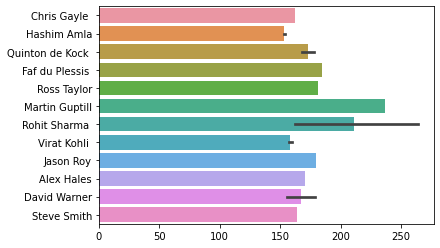

In [137]:
sea.barplot(y=players, x=runs, data=v)
plt.show()


According to the above plot, Martin Guptill is the highest run scorer, followed by Rohit Sharma


In [138]:
c=br['Country'].unique()
countries =c.tolist()
c

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

# Teams which won most matches

In [139]:
won = br.loc[br['Result']=='won']
wi= br.loc[(br['Result']=='won') & (br['Country']=='WestIndies') ]
sri = br.loc[(br['Result']=='won') & (br['Country']=='SriLanka') ]
south = br.loc[(br['Result']=='won') & (br['Country']=='SouthAfrica') ]
pak = br.loc[(br['Result']=='won') & (br['Country']=='Pakistan') ]
newz = br.loc[(br['Result']=='won') & (br['Country']=='NewZealand') ]
ind = br.loc[(br['Result']=='won') & (br['Country']=='India') ]
eng =  br.loc[(br['Result']=='won') & (br['Country']=='England') ]
bang= br.loc[(br['Result']=='won') & (br['Country']=='Bangladesh') ]
aust = br.loc[(br['Result']=='won') & (br['Country']=='Australia') ]
afgh= br.loc[(br['Result']=='won') & (br['Country']=='Australia') ]
woncount=[wi['Result'].count(),sri['Result'].count(),south['Result'].count(),pak['Result'].count(),\
           newz['Result'].count(),ind['Result'].count(),eng['Result'].count(),bang['Result'].count(),aust['Result'].count(),afgh['Result'].count(),]

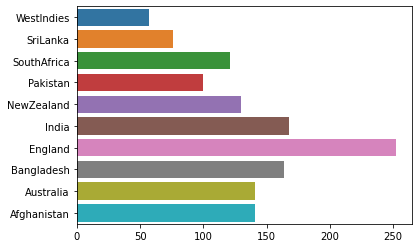

In [140]:
sea.barplot(y=countries, x=woncount, data=won)
plt.show()

# which which lost most matches

In [141]:
lost = br.loc[br['Result']=='lost']
wi= br.loc[(br['Result']=='lost') & (br['Country']=='WestIndies') ]
sri = br.loc[(br['Result']=='lost') & (br['Country']=='SriLanka') ]
south = br.loc[(br['Result']=='lost') & (br['Country']=='SouthAfrica') ]
pak = br.loc[(br['Result']=='lost') & (br['Country']=='Pakistan') ]
newz = br.loc[(br['Result']=='lost') & (br['Country']=='NewZealand') ]
ind = br.loc[(br['Result']=='lost') & (br['Country']=='India') ]
eng =  br.loc[(br['Result']=='lost') & (br['Country']=='England') ]
bang= br.loc[(br['Result']=='lost') & (br['Country']=='Bangladesh') ]
aust = br.loc[(br['Result']=='lost') & (br['Country']=='Australia') ]
afgh= br.loc[(br['Result']=='lost') & (br['Country']=='Australia') ]
lostcount=[wi['Result'].count(),sri['Result'].count(),south['Result'].count(),pak['Result'].count(),\
           newz['Result'].count(),ind['Result'].count(),eng['Result'].count(),bang['Result'].count(),aust['Result'].count(),afgh['Result'].count(),]

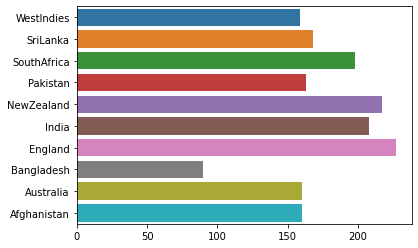

In [142]:
sea.barplot(y=countries, x=lostcount, data=lost)
plt.show()

According to the above 3 plots England has played most matches, therefore they have won and lost in the same range.Other than England, India and Bangladesh has most wins and New Zealand and India has most loses


In [143]:
valuebr = br

In [144]:
br

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
7,18,49619,Oshane Thomas,WestIndies,Pakistan,1*,1,1,100.00,0,0,Sharjah,18 Dec 2013,ODI # 3445,311,323.0,49.4,6.26,2.0,lost
9,27,49619,Oshane Thomas,WestIndies,England,4*,4,5,80.00,0,0,The Oval,22 May 2014,ODI # 3492,144,226.0,27.5,5.17,2.0,lost
10,30,49619,Oshane Thomas,WestIndies,New Zealand,0,0,3,0.00,0,0,Dunedin,23 Jan 2015,ODI # 3588,252,361.0,43.4,5.77,2.0,lost
11,31,49619,Oshane Thomas,WestIndies,New Zealand,3,3,5,60.00,0,0,Dunedin,25 Jan 2015,ODI # 3590,195,316.0,40.3,4.81,2.0,lost
12,32,49619,Oshane Thomas,WestIndies,New Zealand,7*,7,17,41.17,0,0,Christchurch,14 Feb 2015,ODI # 3599,233,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,11140,352048,Gulbadin Naib,Afghanistan,Sri Lanka,4,4,5,80.00,0,0,Abu Dhabi,17 Sep 2018,ODI # 4038,158,250.0,41.2,3.82,2.0,lost
8811,11141,352048,Gulbadin Naib,Afghanistan,Bangladesh,42*,42,38,110.52,5,0,Abu Dhabi,20 Sep 2018,ODI # 4041,119,256.0,42.1,2.82,2.0,lost
8812,11142,352048,Gulbadin Naib,Afghanistan,Pakistan,10*,10,7,142.85,1,0,Abu Dhabi,21 Sep 2018,ODI # 4043,258/7,258.0,49.3,5.21,2.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied


In [145]:
cd =br[['Runs','Target']]
cd.head()

,Runs,Target
7,1,323.0
9,4,226.0
10,0,361.0
11,3,316.0
12,7,332.0


# Features distribution

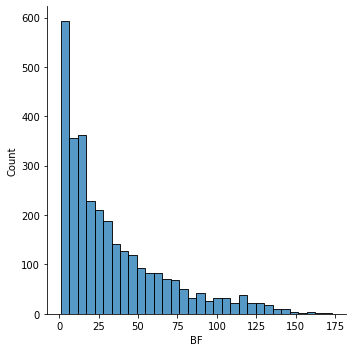

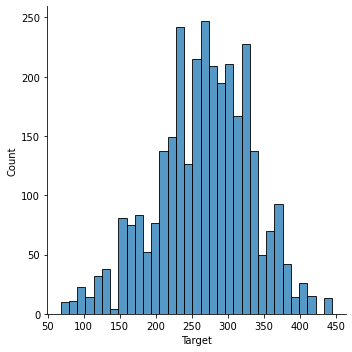

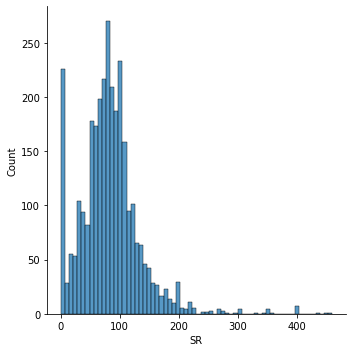

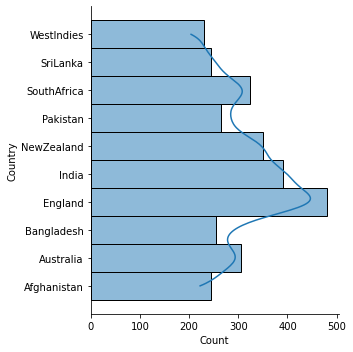

In [146]:
sea.displot(br['BF'])
sea.displot(br['Target'])
sea.displot(br['SR'])
sea.displot(y=br['Country'],kde=True)
plt.show()

### Removing first  5 overs

In [147]:
print("before removal",br.shape)
br = br[br['Overs'] >=5.0]
print("before removal",br.shape)

before removal (3086, 20)
before removal (3080, 20)


### Dropping irrelevant columns

In [148]:
print("before dropping",br.shape)
newbr=br.drop(columns=['ID','Country','Bat1','Ground','Start Date','Match_ID'])
print("after dropping",newbr.shape)

before dropping (3080, 20)
after dropping (3080, 14)


In [149]:
newbr['Team Runs'] = newbr['Team Runs'].str.replace('/','.')
newbr['Team Runs'] = pd.to_numeric(newbr['Team Runs'])
newdup=newbr.copy()
newbr[newbr['Player']=='Virat Kohli ']

,Player_ID,Player,Opposition,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns,Result
5254,253802,Virat Kohli,Pakistan,7,17,41.17,1,0,157.0,168.0,48.5,3.21,2.0,lost
5255,253802,Virat Kohli,England,15,22,68.18,1,0,316.9,326.0,50.0,6.32,2.0,lost
5257,253802,Virat Kohli,England,77,79,97.46,9,2,157.3,156.0,28.1,5.57,2.0,won
5258,253802,Virat Kohli,England,26,33,78.78,3,0,258.5,258.0,47.3,5.43,2.0,won
5260,253802,Virat Kohli,South Africa,31,41,75.60,2,0,305.0,332.0,50.0,6.1,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,253802,Virat Kohli,Australia,46,62,74.19,3,0,234.3,231.0,49.2,4.74,2.0,won
5377,253802,Virat Kohli,New Zealand,43,45,95.55,5,0,234.0,325.0,40.2,5.8,2.0,lost
5379,253802,Virat Kohli,Australia,44,45,97.77,6,1,240.4,237.0,48.2,4.96,2.0,won
5381,253802,Virat Kohli,Australia,123,95,129.47,16,1,281.0,314.0,48.2,5.81,2.0,lost


In [150]:
newbr

,Player_ID,Player,Opposition,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns,Result
7,49619,Oshane Thomas,Pakistan,1,1,100.00,0,0,311.0,323.0,49.4,6.26,2.0,lost
9,49619,Oshane Thomas,England,4,5,80.00,0,0,144.0,226.0,27.5,5.17,2.0,lost
10,49619,Oshane Thomas,New Zealand,0,3,0.00,0,0,252.0,361.0,43.4,5.77,2.0,lost
11,49619,Oshane Thomas,New Zealand,3,5,60.00,0,0,195.0,316.0,40.3,4.81,2.0,lost
12,49619,Oshane Thomas,New Zealand,7,17,41.17,0,0,233.0,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,352048,Gulbadin Naib,Sri Lanka,4,5,80.00,0,0,158.0,250.0,41.2,3.82,2.0,lost
8811,352048,Gulbadin Naib,Bangladesh,42,38,110.52,5,0,119.0,256.0,42.1,2.82,2.0,lost
8812,352048,Gulbadin Naib,Pakistan,10,7,142.85,1,0,258.7,258.0,49.3,5.21,2.0,won
8814,352048,Gulbadin Naib,India,15,46,32.60,1,0,252.0,253.0,49.5,5.05,2.0,tied


# Heatmap

In [163]:
newbr['Team Runs'] = newbr['Team Runs'].astype(float)
newbr['Inns'] = newbr['Inns'].astype(float)
newbr['RPO'] = newbr['RPO'].astype(float)
newbr.dtypes

Player_ID       int64
Player         object
Opposition     object
Runs            int64
BF              int64
SR            float64
4s              int64
6s              int64
Team Runs     float64
Target        float64
Overs         float64
RPO           float64
Inns          float64
Result         object
dtype: object

In [164]:
heatbr = newbr[['Runs','BF','SR','4s','6s','Overs','Target','Team Runs','RPO']]
heatbr

,Runs,BF,SR,4s,6s,Overs,Target,Team Runs,RPO
7,1,1,100.00,0,0,49.4,323.0,311.0,6.26
9,4,5,80.00,0,0,27.5,226.0,144.0,5.17
10,0,3,0.00,0,0,43.4,361.0,252.0,5.77
11,3,5,60.00,0,0,40.3,316.0,195.0,4.81
12,7,17,41.17,0,0,46.1,332.0,233.0,5.04
...,...,...,...,...,...,...,...,...,...
8810,4,5,80.00,0,0,41.2,250.0,158.0,3.82
8811,42,38,110.52,5,0,42.1,256.0,119.0,2.82
8812,10,7,142.85,1,0,49.3,258.0,258.7,5.21
8814,15,46,32.60,1,0,49.5,253.0,252.0,5.05


In [165]:
heatbr.dtypes

Runs           int64
BF             int64
SR           float64
4s             int64
6s             int64
Overs        float64
Target       float64
Team Runs    float64
RPO          float64
dtype: object

In [166]:
heatbr.corr()

,Runs,BF,SR,4s,6s,Overs,Target,Team Runs,RPO
Runs,1.000000,0.935235,0.322928,0.903920,0.652761,0.124625,0.202519,0.225487,0.176172
BF,0.935235,1.000000,0.133486,0.809351,0.480938,0.121661,0.106614,0.151285,0.077815
SR,0.322928,0.133486,1.000000,0.338358,0.385539,0.079355,0.204309,0.210656,0.215499
4s,0.903920,0.809351,0.338358,1.000000,0.480360,0.070204,0.165656,0.199016,0.198755
6s,0.652761,0.480938,0.385539,0.480360,1.000000,0.064953,0.202481,0.195296,0.204025
Overs,0.124625,0.121661,0.079355,0.070204,0.064953,1.000000,0.545685,0.755967,-0.047203
Target,0.202519,0.106614,0.204309,0.165656,0.202481,0.545685,1.000000,0.645867,0.253239
Team Runs,0.225487,0.151285,0.210656,0.199016,0.195296,0.755967,0.645867,1.000000,0.583777
RPO,0.176172,0.077815,0.215499,0.198755,0.204025,-0.047203,0.253239,0.583777,1.000000


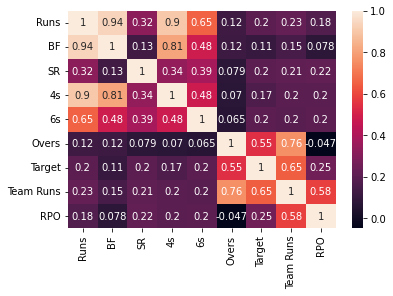

In [167]:
from seaborn import heatmap
heatmap(data=heatbr.corr(),annot=True)
plt.show()


In the above heatmap we get a clear picture of features and its correlations.
and here Runs and BF are closely correlated. 
Which means there will be more impact on Runs by the balls faced than other features
Here is a regression  plot of BF and Runs

# Regplot

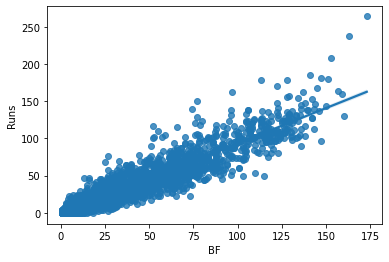

In [168]:
sea.regplot(x=heatbr['BF'],y=heatbr['Runs'],data=heatbr)
plt.show()

# Encoding using dummies

In [169]:
t3newbr=newbr.copy()
t3newbr

,Player_ID,Player,Opposition,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns,Result
7,49619,Oshane Thomas,Pakistan,1,1,100.00,0,0,311.0,323.0,49.4,6.26,2.0,lost
9,49619,Oshane Thomas,England,4,5,80.00,0,0,144.0,226.0,27.5,5.17,2.0,lost
10,49619,Oshane Thomas,New Zealand,0,3,0.00,0,0,252.0,361.0,43.4,5.77,2.0,lost
11,49619,Oshane Thomas,New Zealand,3,5,60.00,0,0,195.0,316.0,40.3,4.81,2.0,lost
12,49619,Oshane Thomas,New Zealand,7,17,41.17,0,0,233.0,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,352048,Gulbadin Naib,Sri Lanka,4,5,80.00,0,0,158.0,250.0,41.2,3.82,2.0,lost
8811,352048,Gulbadin Naib,Bangladesh,42,38,110.52,5,0,119.0,256.0,42.1,2.82,2.0,lost
8812,352048,Gulbadin Naib,Pakistan,10,7,142.85,1,0,258.7,258.0,49.3,5.21,2.0,won
8814,352048,Gulbadin Naib,India,15,46,32.60,1,0,252.0,253.0,49.5,5.05,2.0,tied


In [170]:
import re
dummies = pd.get_dummies(t3newbr[['Player','Opposition']],prefix='').astype(int)
dummies.rename(columns=lambda x: re.sub(r'_v', '', x), inplace=True)
dummies.rename(columns=lambda y: re.sub(r'_', '', y), inplace=True)
dummies.astype(float)

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Kenya,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:

mergfile = pd.concat([dummies,t3newbr],axis='columns')
mergfile.describe()

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns
count,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,...,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.0
mean,0.018831,0.000649,0.002273,0.007143,0.000974,0.002273,0.004545,0.012662,0.003896,0.003571,...,30.350649,33.857143,82.938256,2.784091,0.604545,226.957435,266.432143,42.081753,5.374513,2.0
std,0.135951,0.025478,0.047627,0.084227,0.031199,0.047627,0.067278,0.111831,0.062307,0.059664,...,33.431132,32.905610,51.666974,3.385554,1.259757,62.996187,66.688949,8.605127,1.057061,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,51.200000,68.000000,9.500000,2.390000,2.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,9.000000,53.330000,0.000000,0.000000,186.200000,227.000000,39.100000,4.680000,2.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,23.000000,80.000000,2.000000,0.000000,230.800000,270.000000,44.500000,5.300000,2.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.000000,49.000000,104.760000,4.000000,1.000000,267.000000,311.000000,48.500000,6.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,264.000000,173.000000,460.000000,33.000000,14.000000,389.000000,445.000000,50.000000,10.130000,2.0


In [172]:
final = mergfile.drop(['Player','Opposition','Result','Inns','4s','6s','Player_ID','SR','RPO','Team Runs','Target'],axis='columns')
final

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe,Runs,BF,Overs
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,49.4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,5,27.5
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,43.4
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,40.3
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,17,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,5,41.2
8811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,38,42.1
8812,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,10,7,49.3
8814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,46,49.5


In [173]:
final

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe,Runs,BF,Overs
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,49.4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,5,27.5
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,43.4
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,40.3
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,17,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,5,41.2
8811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,38,42.1
8812,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,10,7,49.3
8814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,46,49.5


In [174]:
demo = final[['Virat Kohli ','Pakistan','Runs','BF','Overs']]
demo.head(4)

,Virat Kohli,Pakistan,Runs,BF,Overs
7,0,1,1,1,49.4
9,0,0,4,5,27.5
10,0,0,0,3,43.4
11,0,0,3,5,40.3


# Training and Testing Model

Dividing into X and Y variables

In [175]:
from sklearn.model_selection import train_test_split
X= demo.drop(['Runs'],axis=1)
Y = demo['Runs']
train_X, test_X, train_Y,test_Y = train_test_split(X, Y, test_size=0.20, shuffle=True)

In [176]:
comp=dict()

# Prediction

Using various types of regressors to get the best accuracy

# Decision Tree Regressor

In [177]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
#Train Model
tree.fit(test_X,test_Y)
tree.score(test_X,test_Y)

0.9864196152149186

In [178]:
tree=tree.score(test_X,test_Y)
comp['tree']=tree

# K Neighbors Regressor

In [179]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(test_X,test_Y)
knr.score(test_X,test_Y)

0.8892732650539801

In [180]:
knr=knr.score(test_X,test_Y)
comp['knr']=knr

# XGBRegressor

In [181]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(test_X,test_Y)
xgb.score(test_X,test_Y)

0.9841430835892684

In [182]:
xgb=xgb.score(test_X,test_Y)
comp['xgb']=xgb

# RandomForestRegressor

In [183]:
from sklearn.ensemble import RandomForestRegressor
fors = RandomForestRegressor()
fors.fit(test_X,test_Y)
fors.score(test_X,test_Y)

0.9637267752627555

In [184]:
fors=fors.score(test_X,test_Y)
comp['fors']=fors

# Linear Regression

In [185]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(test_X,test_Y)
li.score(test_X,test_Y)

0.8607986175641694

In [186]:
li=li.score(test_X,test_Y)
comp['li']=li

# SVR

In [187]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(test_X,test_Y)
sv.score(test_X,test_Y)

0.7678401637372149

In [188]:
sv=sv.score(test_X,test_Y)
comp['sv']=sv
plt.show()

# Comparison between Regressors

<BarContainer object of 6 artists>

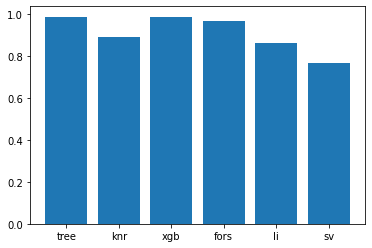

In [189]:
keys = list(comp.keys())
val = list(comp.values())
plt.bar(keys,val)


After comparison between the  regressors , we can see that Decision Tree Regressor is having the highest accuracy,
and which is best for our model. Therefore we choose Decision Tree Regressor 

# Selecting Decision Tree Regressor

In [190]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(test_X,test_Y)
tree.score(test_X,test_Y)

0.9864196152149186

# Predicting Runs of a Specific Player

It can accept player name and opposition and along with it can can accept how many balls a player might face in a certain
over


In [191]:
player = input('enter the name')
opposition = input('enter opposition team')
demo = final[[player,opposition,'Runs','BF','Overs']]
bf=float(input('enter balls faced'))
ov=float(input('enter the overs'))
tree.fit(test_X,test_Y)
preds=tree.predict([[1,1,bf,ov]])
print(player+"'s overall run predicted is",preds,"Against",opposition)

enter the nameMS Dhoni 
enter opposition teamEngland
enter balls faced25
enter the overs50
MS Dhoni 's overall run predicted is [29.5] Against England


c:\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Accuracy

In [192]:
tree.score(test_X,test_Y)

0.9864196152149186